## Read Data from CSV and Calculate DQI

**Description**: Read data from a CSV file, identify errors as missing values, and calculate the DQI.

In [ ]:
# Write your code from here

### Visualize Basic DQI with Bar Plot

**Description**: Create a bar plot for DQI and errors in a dataset.

In [ ]:
# Write your code from here

In [3]:
# Save the dataset if not already saved
import pandas as pd

data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 5, 8, 9],
    'Name': ['John Doe', 'Jane Smith', 'Bob Johnson', 'Alice White', 'Charlie Brown',
             'David Lee', 'john doe', 'Eve Adams', 'Ann Marie', "Tom O'Neil"],
    'Age': [20, 22, 19, 25, 21, None, 23, 121, 30, 19],
    'Grade': [85, 90, 78, 88, 95, 80, 101, 70, 85, None],
    'Email': ['johndoe@example.com', 'janesmith@example.com', 'bobjohnson@example.com',
              'alicewhite@example.com', 'charliebrown@example.com', 'invalid-email',
              'johndoe@domain', 'eveadams@example.com', 'annmarie@example.com', 'tomoneil@example.com']
}

df = pd.DataFrame(data)
df.to_csv('sample_data.csv', index=False)
print("✅ 'sample_data.csv' created.")


✅ 'sample_data.csv' created.


✅ Data loaded successfully from sample_data.csv

📊 DQI Score: 96.0%



/tmp/ipykernel_28682/4001003299.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Valid Data', 'Missing Data'], y=[valid_cells, missing_cells], palette=['#4CAF50', '#F44336'])


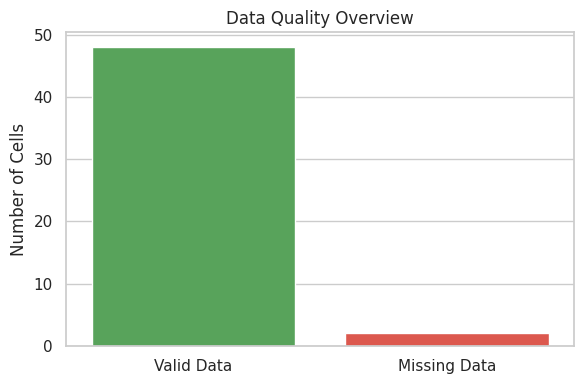

test_all_missing_data (__main__.TestDQICalculation)
Test DQI when all values are missing. ... ok
test_empty_dataframe (__main__.TestDQICalculation)
Test DQI for an empty DataFrame. ... ok
test_no_missing_data (__main__.TestDQICalculation)
Test DQI when there are no missing values. ... ok
test_partial_missing_data (__main__.TestDQICalculation)
Test DQI for partial missing values. ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.011s

OK


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import unittest

# --------------------------
# Step 1: Read CSV Safely
# --------------------------

def read_csv_file(filepath):
    """Read CSV and handle potential encoding or format errors."""
    try:
        df = pd.read_csv(filepath, encoding='utf-8')
        print(f"✅ Data loaded successfully from {filepath}")
        return df
    except pd.errors.ParserError:
        print("❌ Error: The CSV file is malformed.")
        return pd.DataFrame()
    except UnicodeDecodeError:
        print("❌ Error: Unsupported character encoding in the CSV file.")
        return pd.DataFrame()

# --------------------------
# Step 2: Calculate DQI
# --------------------------

def calculate_dqi(df):
    """
    Calculate the Data Quality Index.
    
    DQI = % of non-missing values across the dataset.
    """
    if df.empty:
        return 0.0

    total_cells = df.size
    missing_cells = df.isnull().sum().sum()
    dqi = round((1 - (missing_cells / total_cells)) * 100, 2)
    return dqi

# --------------------------
# Step 3: Visualize DQI
# --------------------------

def plot_dqi_vs_errors(df):
    """Generate a bar plot comparing valid vs. missing data."""
    total_cells = df.size
    missing_cells = df.isnull().sum().sum()
    valid_cells = total_cells - missing_cells

    # Plot
    sns.set(style="whitegrid")
    plt.figure(figsize=(6, 4))
    sns.barplot(x=['Valid Data', 'Missing Data'], y=[valid_cells, missing_cells], palette=['#4CAF50', '#F44336'])
    plt.title("Data Quality Overview")
    plt.ylabel("Number of Cells")
    plt.tight_layout()
    plt.show()

# --------------------------
# Step 4: Example Usage
# --------------------------

# ⚠️ Ensure this file exists or is generated with the earlier code
csv_file = 'sample_data.csv'

df = read_csv_file(csv_file)
dqi_score = calculate_dqi(df)
print(f"\n📊 DQI Score: {dqi_score}%\n")

if not df.empty:
    plot_dqi_vs_errors(df)

# --------------------------
# Step 5: Unit Tests
# --------------------------

class TestDQICalculation(unittest.TestCase):

    def test_empty_dataframe(self):
        """Test DQI for an empty DataFrame."""
        empty_df = pd.DataFrame()
        dqi = calculate_dqi(empty_df)
        self.assertEqual(dqi, 0.0)

    def test_all_missing_data(self):
        """Test DQI when all values are missing."""
        df = pd.DataFrame({
            'a': [None, None],
            'b': [None, None]
        })
        dqi = calculate_dqi(df)
        self.assertEqual(dqi, 0.0)

    def test_no_missing_data(self):
        """Test DQI when there are no missing values."""
        df = pd.DataFrame({
            'a': [1, 2],
            'b': [3, 4]
        })
        dqi = calculate_dqi(df)
        self.assertEqual(dqi, 100.0)

    def test_partial_missing_data(self):
        """Test DQI for partial missing values."""
        df = pd.DataFrame({
            'a': [1, None],
            'b': [3, 4]
        })
        dqi = calculate_dqi(df)
        self.assertEqual(dqi, 75.0)

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False, verbosity=2)
